## Problem Statement

Provide insights from the data coming from call center and use the data to launch a new product called a term deposit. Before the launch business wants to develop a model that offers high success outcomes for term deposit.

## Data Information:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Features
age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

### The classification goal is to predict if the client will subscribe (yes/no) a term deposit( variable y)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
# Create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 9 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
There are 5 continuous variables: 
 ['age', 'balance', 'day', 'duration', 'campaign']


In [8]:
# Check the number of unique values and the percent each value represents
# For each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 blue-collar      23.46
management       20.42
technician       17.13
admin            11.21
services          9.78
retired           3.59
self-employed     3.54
entrepreneur      3.51
unemployed        2.76
housemaid         2.72
student           1.31
unknown           0.59
Name: job, dtype: float64 

Unique values for marital: 3
 married     60.96
single      27.22
divorced    11.81
Name: marital, dtype: float64 

Unique values for education: 4
 secondary    52.48
tertiary     28.02
primary      15.68
unknown       3.83
Name: education, dtype: float64 

Unique values for default: 2
 no     97.98
yes     2.02
Name: default, dtype: float64 

Unique values for housing: 2
 yes    60.08
no     39.92
Name: housing, dtype: float64 

Unique values for loan: 2
 no     82.68
yes    17.32
Name: loan, dtype: float64 

Unique values for contact: 3
 cellular     62.28
unknown      31.91
telephone     5.80
Name: contact, dtype: float64 

Unique values for month: 11
 may  

# Inference from Above table
- Blue-collar , management and technician are the top three jobs.
- More than 50% of the people are married rest are either unmarried or divorced.
- Secondary education tops the list followed by tertiary and primary education.
- 97% of people do not have default.
- 60% people have house.
- 82% people don't have personal loan
- 62% people use cellular phone as contact while 31% of the contacts were unknown.

## Based on this 



In [9]:
df = df.drop(columns=['duration'], axis=1)

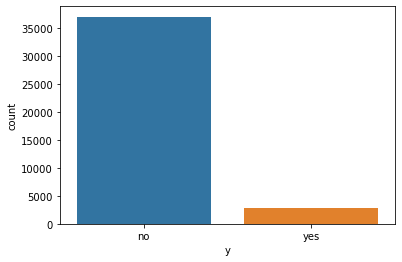

In [10]:
sns.countplot(x='y',data=df)

In [11]:
df['y'].value_counts(normalize=True)

no     0.9276
yes    0.0724
Name: y, dtype: float64

We are dealing with imbalanced classes with 92% of the entries representing for a customer who did not subscribe to term deposit

### Investigate Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D19BCE700>,
      dtype=object)

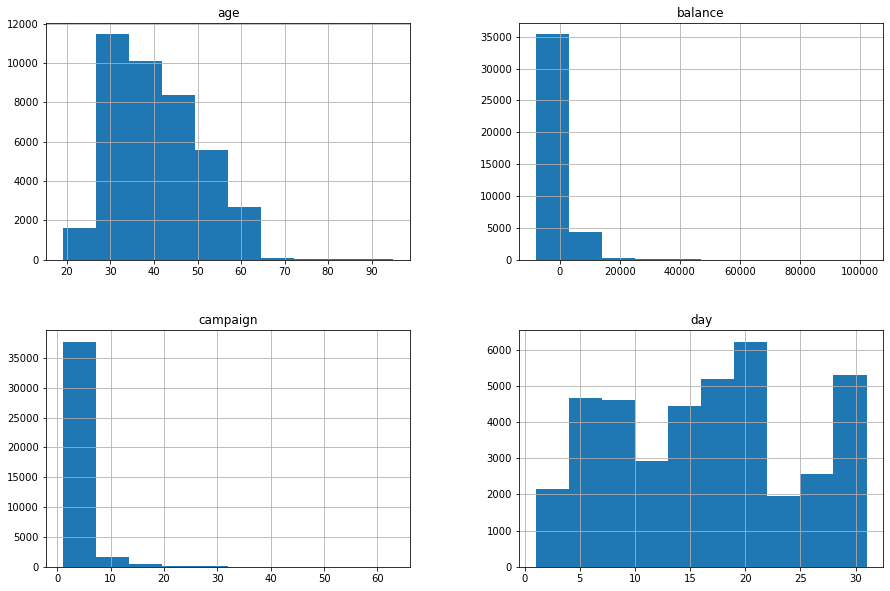

In [12]:
df.hist(bins =10 ,figsize = (15,10))

### Bivariate Analysis

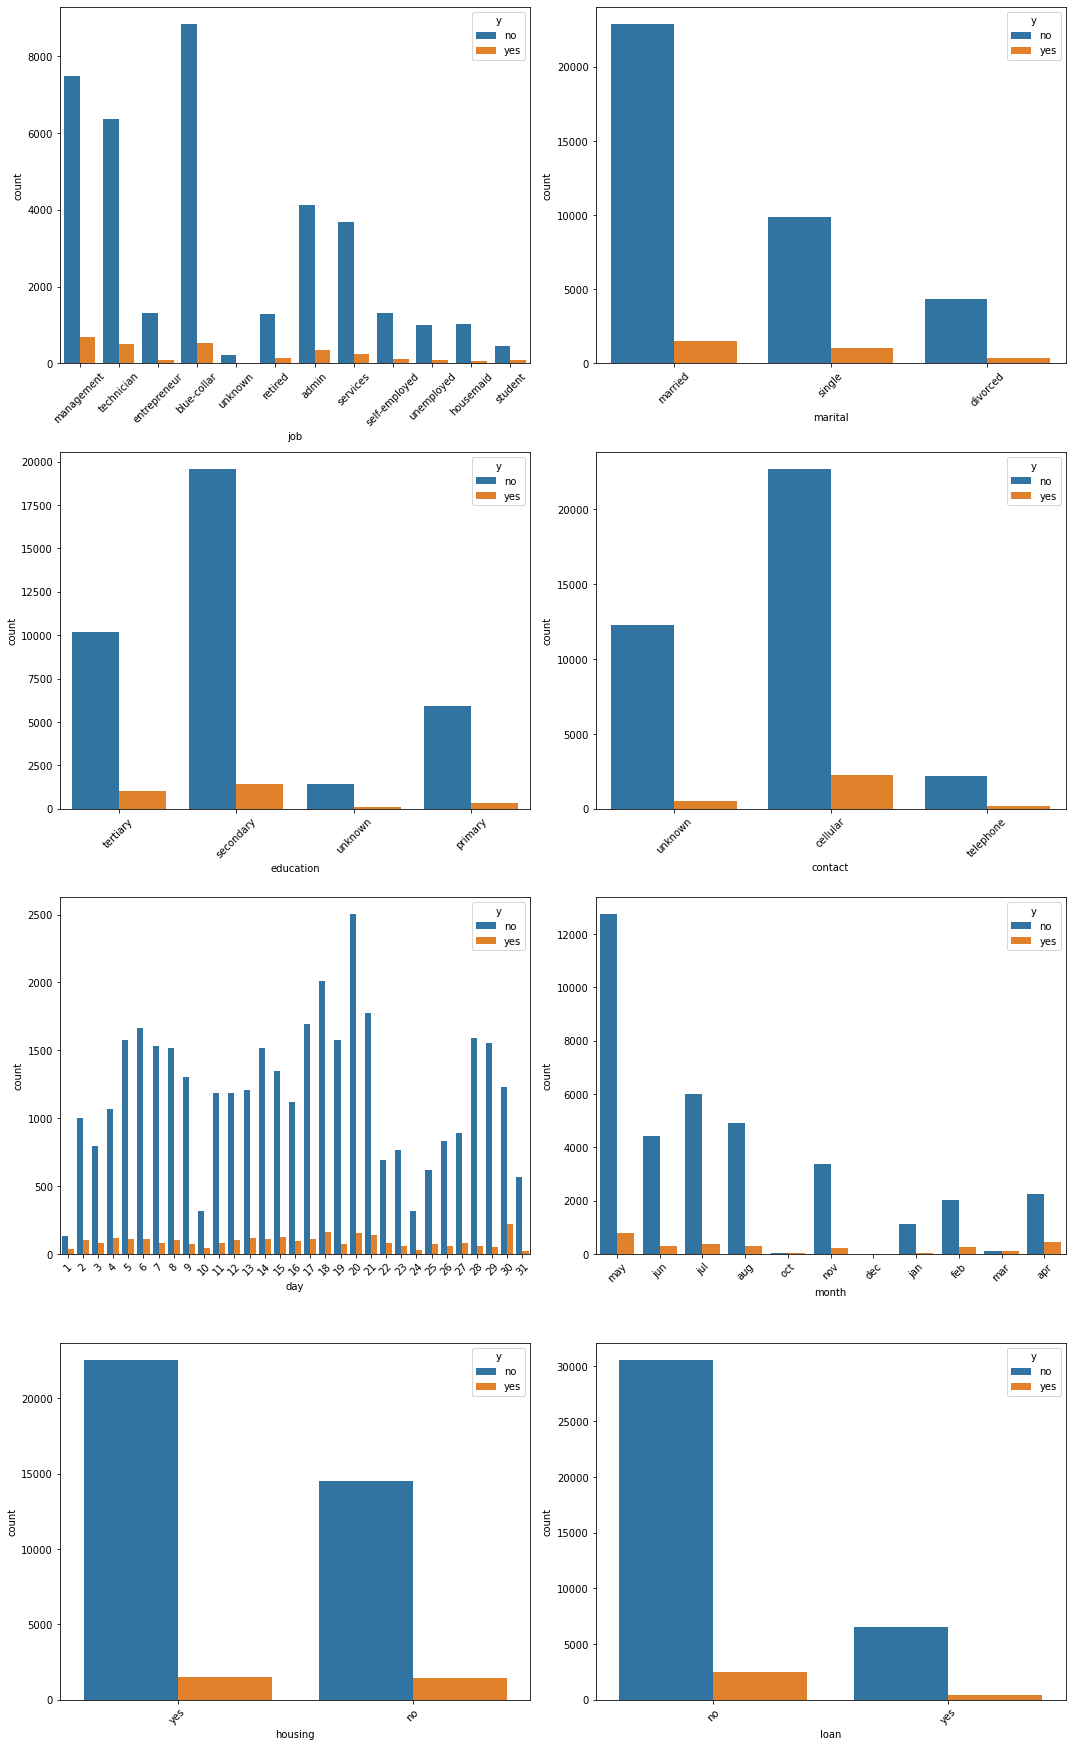

In [13]:
plt.figure(figsize=(15,30))
plt.subplot(5, 2, 1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 2)
sns.countplot(x='marital',hue = 'y',data=df)
plt.xticks(rotation=45)


plt.subplot(5, 2, 3)
sns.countplot(x='education',hue ='y',data = df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 4)
sns.countplot(x='contact',hue = 'y',data = df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 5)
sns.countplot(x='day',hue='y',data=df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 6)
sns.countplot(x='month',hue='y',data=df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 7)
sns.countplot(x='housing',hue ='y',data = df)
plt.xticks(rotation=45)

plt.subplot(5, 2, 8)
sns.countplot(x='loan',hue ='y',data = df)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Try to use percentage,no of blue collar workers who have said yes divided by tatal number of people who have said yes.
## similarly for no 
## matplotlib bar plot
## ratio of yes/no 

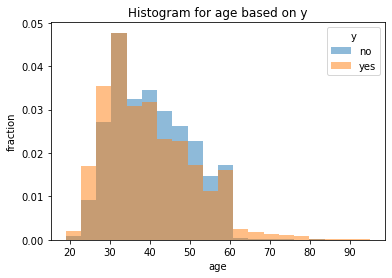

In [14]:
from matplotlib import pylab as plt
categories = df['y'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['y']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend(title='y')
plt.ylabel('fraction')
plt.xlabel('age')
plt.title('Histogram for age based on y')
plt.show()
    

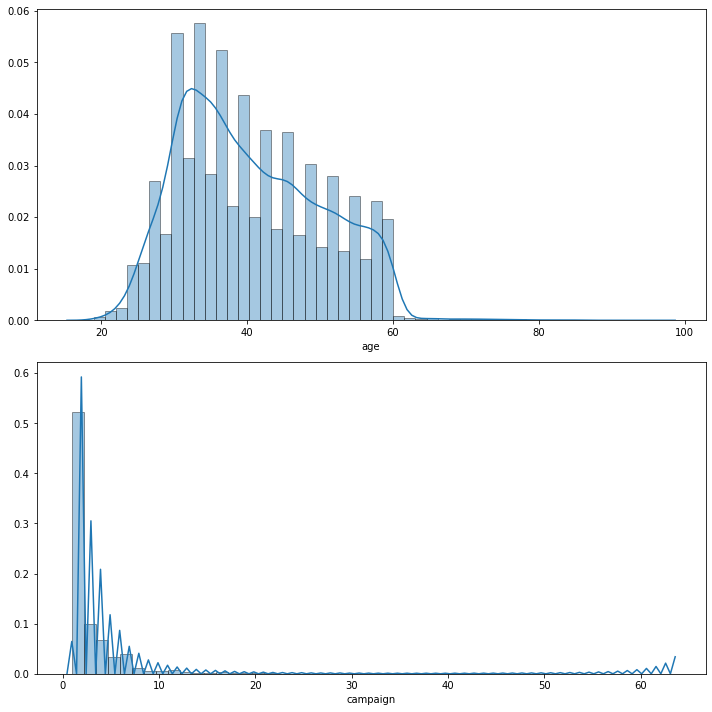

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(df['age'],kde=True,hist_kws=dict(edgecolor='k',linewidth=1))

plt.subplot(2,1,2)
sns.distplot(df['campaign'],kde=True,hist_kws=dict(edgecolor='k',linewidth=1))

plt.tight_layout()
plt.show()


In [16]:
print('Maximum Age:',df['age'].max(),'Years')
print('Minimum Age:',df['age'].min(),'Years')
print('Average age:',df['age'].mean(),'Years')

Maximum Age: 95 Years
Minimum Age: 19 Years
Average age: 40.5446 Years


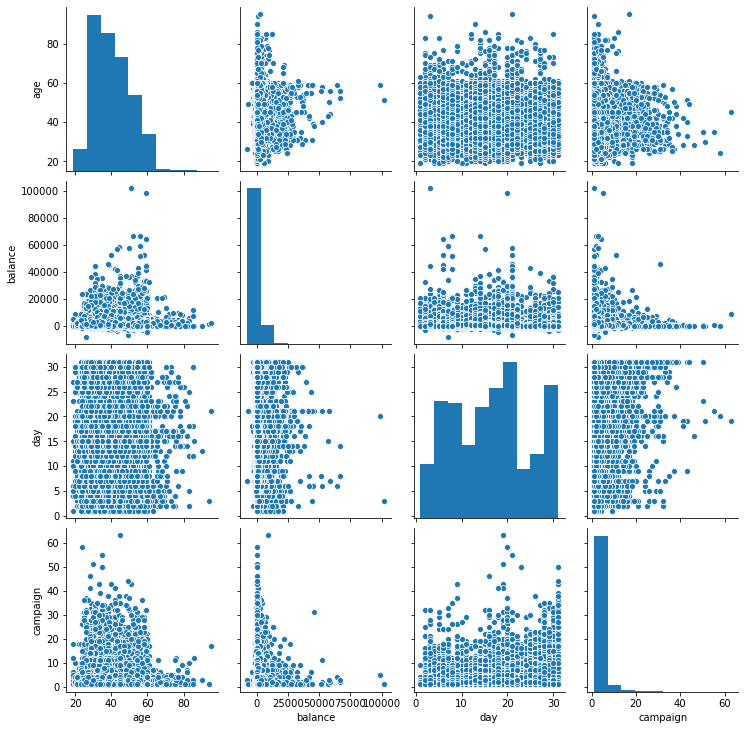

In [17]:
sns.pairplot(df)

In [18]:
#df = df.drop(columns=['month'], axis=1)

In [19]:
# Convert yes/no to 1,0

df.default.replace(('yes','no'),(1,0),inplace=True)
df.housing.replace(('yes','no'),(1,0),inplace=True)
df.loan.replace(('yes','no'),(1,0),inplace=True)
df.y.replace(('yes','no'),(1,0),inplace=True)

In [20]:
jobhousing = pd.crosstab(df['job'],df['housing'])
jobhousing

housing,0,1
job,,
admin,1546,2937
blue-collar,2450,6933
entrepreneur,549,856
housemaid,708,379
management,3797,4369
retired,983,454
self-employed,681,733
services,1198,2712
student,285,239


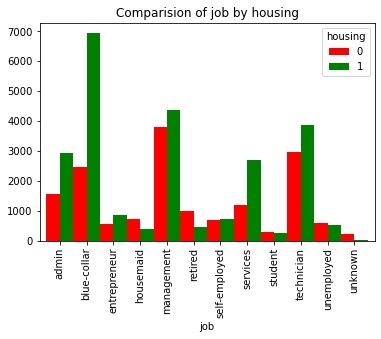

In [21]:
jobhousing.plot(kind='bar',width=1.0,color=['red','green'],title='Comparision of job by housing',grid=False)

In [22]:
jobloan = pd.crosstab(df['job'],df['loan'])
jobloan

loan,0,1
job,,
admin,3586,897
blue-collar,7721,1662
entrepreneur,1055,350
housemaid,940,147
management,6982,1184
retired,1139,298
self-employed,1194,220
services,3089,821
student,515,9


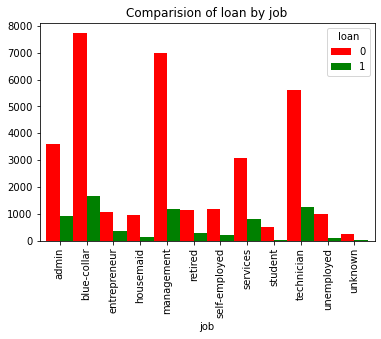

In [23]:
jobloan.plot(kind='bar',width=1.0,color=['red','green'],title='Comparision of loan by job',grid=False)

Text(0.5, 1.05, 'Pearson correlation of Features')

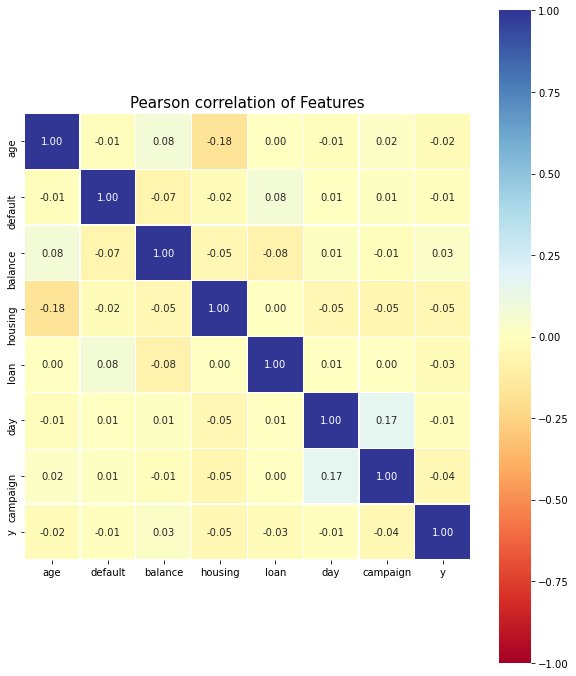

In [24]:
%matplotlib inline
corr = df.corr()

f,ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220,10,as_cmap=True)

_ = sns.heatmap(corr,cmap='RdYlBu',square=True,ax=ax,annot=True,linewidths=0.1,fmt='.2f',vmin=-1,vmax=1)

plt.title('Pearson correlation of Features', y=1.05,size=15)

### parameters that allows to plot negative to positve co-relation sns document plot

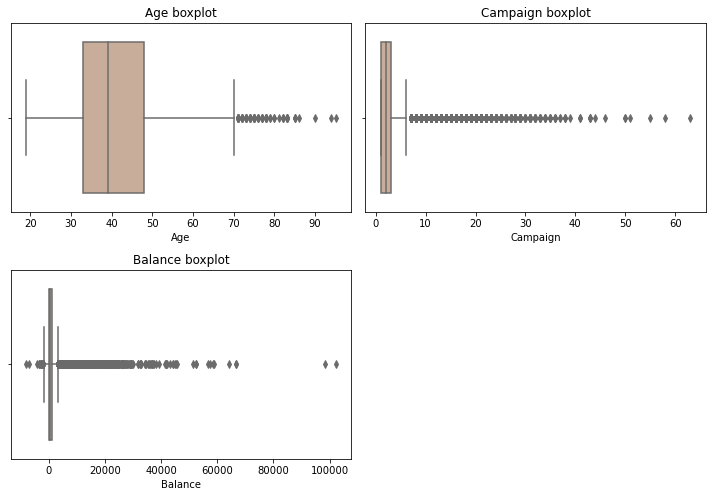

In [25]:
plt.figure(figsize = (10,10))
plt.subplot(3, 2, 1)
sns.boxplot(data = df, x= 'age', palette = 'pink')
plt.title('Age boxplot')
plt.xlabel('Age')


plt.subplot(3, 2, 2)
sns.boxplot(data = df, x= 'campaign', palette = 'pink')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(3, 2, 3)
sns.boxplot(data = df, x= 'balance', palette = 'pink')
plt.title('Balance boxplot')
plt.xlabel('Balance')


plt.tight_layout()
plt.show()


In [26]:
# Outlier filter

def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtered = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
    
    
    return df_filtered

### Check if outlier are saying yes

In [27]:
df_iqr = df.copy()

df_iqr = remove_outliers(df_iqr[['age','campaign','balance']])

In [28]:
print(df.shape[0]-df_iqr.shape[0], 'rows have been eliminated')

7021 rows have been eliminated


In [29]:
df_iqr=df.iloc[df_iqr.index]

In [30]:
df_iqr.reset_index(drop=True, inplace=True)

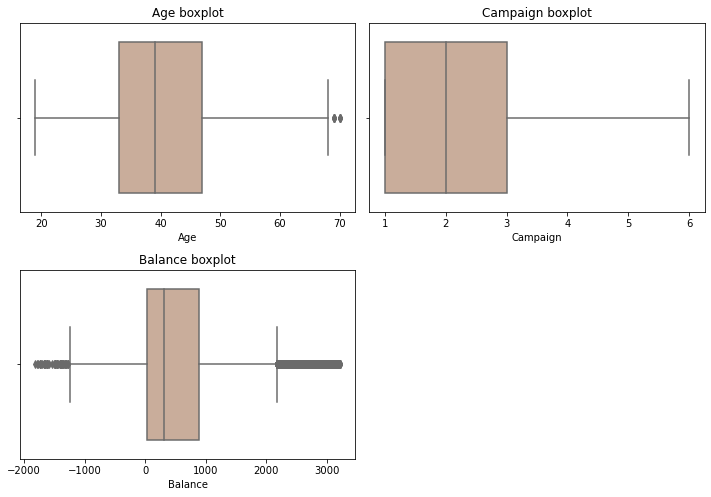

In [31]:
plt.figure(figsize = (10,10))

plt.subplot(3, 2, 1)
sns.boxplot(data = df_iqr, x= 'age', palette = 'pink')
plt.title('Age boxplot')
plt.xlabel('Age')


plt.subplot(3, 2, 2)
sns.boxplot(data = df_iqr, x= 'campaign', palette = 'pink')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')


plt.subplot(3, 2, 3)
sns.boxplot(data=df_iqr, x='balance' , palette = 'pink')
plt.title('Balance boxplot')
plt.xlabel('Balance')

plt.tight_layout()
plt.show()

In [32]:
df_iqr.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,0


In [33]:
df = df_iqr

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,0


In [35]:
# one-hot encode model_data, check the first 5 rows and shape
df_w_dummies = pd.get_dummies(df, drop_first=False)
display(df_w_dummies.head())
df_w_dummies.shape

,age,default,balance,housing,loan,day,campaign,y,job_admin,job_blue-collar,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(32979, 41)

In [36]:
# check column names
df_w_dummies.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct'],
      dtype='object')

In [37]:
# Check the value counts for our target variable
df_w_dummies.y.value_counts(normalize=True)

0    0.929592
1    0.070408
Name: y, dtype: float64

In [38]:
# split out our label (target) data and variables
y = df_w_dummies.y
X = df_w_dummies.drop(columns=['y'])

In [39]:
X.head()

,age,default,balance,housing,loan,day,campaign,job_admin,job_blue-collar,job_entrepreneur,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [41]:
# Train and Test Split 80/20 split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [42]:
X_train.shape,y_train.shape

((26383, 40), (26383,))

In [43]:
X_test.shape,y_test.shape

((6596, 40), (6596,))

In [44]:
from collections import Counter
print(Counter(y_train))

Counter({0: 24517, 1: 1866})


In [45]:
#no     0.9276
#yes    0.0724

### Building model



In [46]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#Our data is not normally distributed so we will use StandardScaler for rescaling the continuous variables
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logit_model = LogisticRegression(solver='liblinear')
LG_model = logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LG_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, logit_predict))

print("Classification Report for Logistic Regression: \n\n", 
      classification_report(y_test, logit_predict))                                                     



Confusion Matrix: 

 [[6131    9]
 [ 446   10]]
Classification Report for Logistic Regression: 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96      6140
           1       0.53      0.02      0.04       456

    accuracy                           0.93      6596
   macro avg       0.73      0.51      0.50      6596
weighted avg       0.90      0.93      0.90      6596



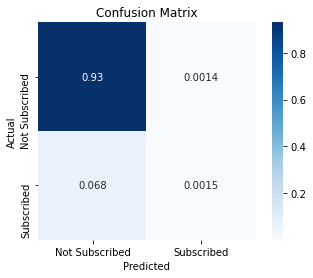

In [47]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, logit_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, logit_predict)

## Logistic Regression Model after using SMOTE

In [48]:
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [49]:
X_train_sm.shape,y_train_sm.shape

((49034, 40), (49034,))

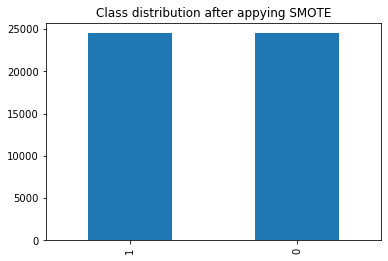

In [50]:
pd.Series(y_train_sm).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE')

In [51]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

logit_model_sm = LogisticRegression(solver='liblinear')
LG_model_sm = logit_model_sm.fit(X_train_sm, y_train_sm)

logit_predict_sm = logit_model_sm.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LG_model_sm.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, logit_predict_sm))

print("Classification Report for Logistic Regression: \n\n", 
      classification_report(y_test, logit_predict_sm))      

Confusion Matrix: 

 [[4066 2074]
 [ 194  262]]
Classification Report for Logistic Regression: 

               precision    recall  f1-score   support

           0       0.95      0.66      0.78      6140
           1       0.11      0.57      0.19       456

    accuracy                           0.66      6596
   macro avg       0.53      0.62      0.48      6596
weighted avg       0.90      0.66      0.74      6596



## Random Forest

In [52]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

rfcl_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=None, class_weight='balanced')
RF_model = rfcl_model.fit(X_train, y_train)

rf_predict = rfcl_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, rf_predict))

print("Classification Report for Random Forest: \n\n",
      classification_report(y_test, rf_predict))

RandomForest = (cross_val_score(rfcl_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Confusion Matrix: 

 [[5139 1001]
 [ 273  183]]
Classification Report for Random Forest: 

               precision    recall  f1-score   support

           0       0.95      0.84      0.89      6140
           1       0.15      0.40      0.22       456

    accuracy                           0.81      6596
   macro avg       0.55      0.62      0.56      6596
weighted avg       0.89      0.81      0.84      6596



k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

rfcl_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=None, class_weight='balanced')
RF_model = rfcl_model.fit(X_train, y_train)

rf_predict = rfcl_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, rf_predict))

print("Classification Report for Random Forest: \n\n",
      classification_report(y_test, rf_predict))

RandomForest = (cross_val_score(rfcl_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

## KNeighbors 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

knn_model = KNeighborsClassifier(n_neighbors=14)
KN_model = knn_model.fit(X_train, y_train)

knn_predict = knn_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, KN_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, rf_predict))

print("Classification Report for Random Forest: \n\n",
      classification_report(y_test, rf_predict))

Confusion Matrix: 

 [[5139 1001]
 [ 273  183]]
Classification Report for Random Forest: 

               precision    recall  f1-score   support

           0       0.95      0.84      0.89      6140
           1       0.15      0.40      0.22       456

    accuracy                           0.81      6596
   macro avg       0.55      0.62      0.56      6596
weighted avg       0.89      0.81      0.84      6596



In [54]:
RF_model.feature_importances_

array([1.11457598e-01, 7.53411204e-03, 1.72891263e-01, 5.16272997e-02,
       1.07540122e-02, 1.39096337e-01, 3.59327550e-02, 7.73820164e-03,
       9.96808147e-03, 5.09901695e-03, 2.08065978e-03, 6.84816316e-03,
       5.15640263e-03, 5.61121641e-03, 8.92243947e-03, 1.55822512e-03,
       9.32621704e-03, 3.95668366e-03, 1.01277803e-03, 1.02199614e-02,
       3.16123469e-02, 5.42899695e-03, 1.06042635e-02, 9.86801987e-03,
       1.06368859e-02, 5.08013712e-03, 4.56663284e-02, 1.55661234e-03,
       6.02929504e-02, 4.13014320e-02, 1.04121983e-02, 9.18109703e-05,
       9.51161493e-03, 7.27212560e-03, 6.00856219e-03, 3.70401061e-02,
       4.02026408e-02, 2.45277270e-02, 1.12177926e-02, 2.48760246e-02])

## Feature Importances

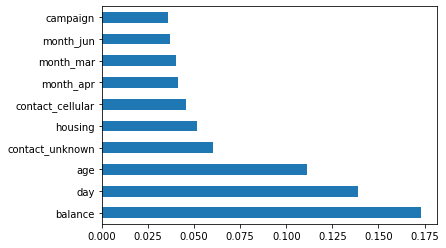

In [55]:
(pd.Series(RF_model.feature_importances_,index=X.columns).nlargest(10).plot(kind='barh'))

Based on Random Forest Model most important variables are balance,day and age

In [56]:
logit_model = LogisticRegression(class_weight="balanced", solver='liblinear')
LG_model = logit_model.fit(X_train, y_train)
print("The score for logit is")
print("Training: {:6.2f}%".format(100*LG_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*LG_model.score(X_test, y_test)))

The score for logit is
Training:  66.05%
Test set:  66.04%


In [57]:
rfcl_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=None, class_weight='balanced')
RF_model = rfcl_model.fit(X_train, y_train)
print("The score for RF is")
print("Training: {:6.2f}%".format(100*RF_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*RF_model.score(X_test, y_test)))

The score for RF is
Training:  83.19%
Test set:  80.73%
